df.keys():
 Index(['ID', 'AGE', 'SEX', 'EDUC', 'RACE', 'BMI', 'APOE4', 'percenthipp',
       'thick', 'centiloid', 'Cog_Convert', 'followuptime', 'biomarker_group'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               460 non-null    int64  
 1   AGE              460 non-null    float64
 2   SEX              460 non-null    object 
 3   EDUC             460 non-null    int64  
 4   RACE             460 non-null    object 
 5   BMI              459 non-null    float64
 6   APOE4            460 non-null    int64  
 7   percenthipp      460 non-null    float64
 8   thick            460 non-null    float64
 9   centiloid        460 non-null    float64
 10  Cog_Convert      460 non-null    int64  
 11  followuptime     459 non-null    float64
 12  biomarker_group  460 non-null    int64  
dtypes: float64(6

4    0.543478
2    0.250000
3    0.130435
1    0.076087
Name: biomarker_group, dtype: float64

Original


4    0.547826
2    0.247826
3    0.132609
1    0.071739
Name: biomarker_group, dtype: float64

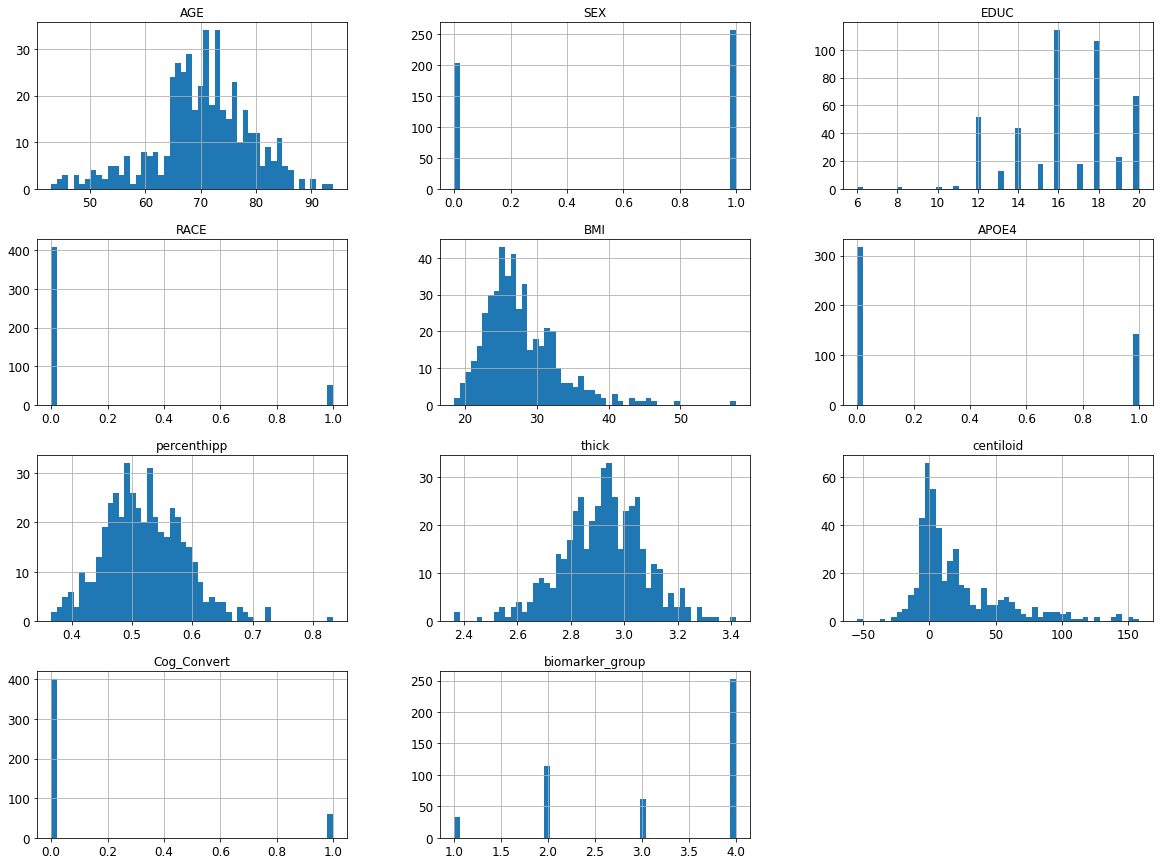

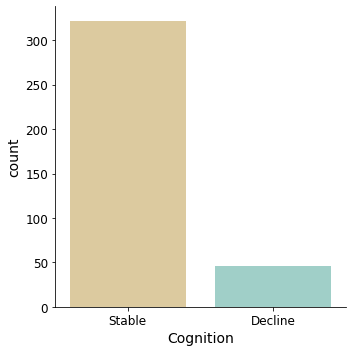

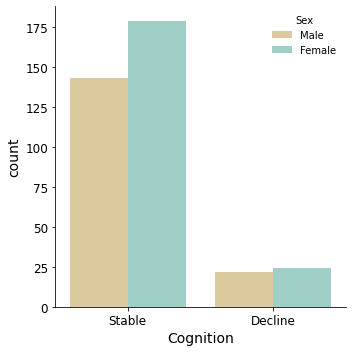

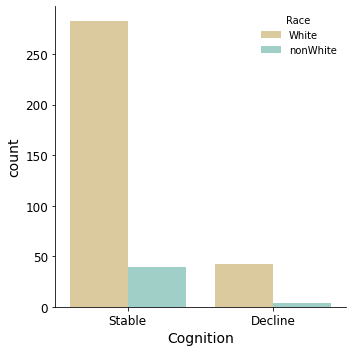

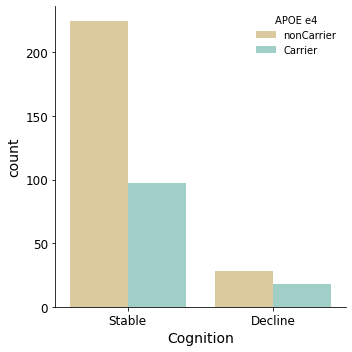

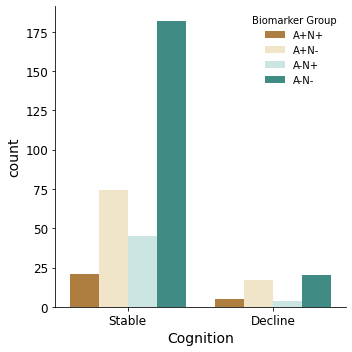

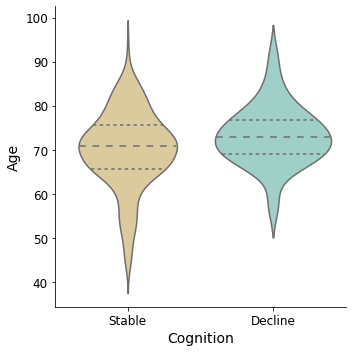

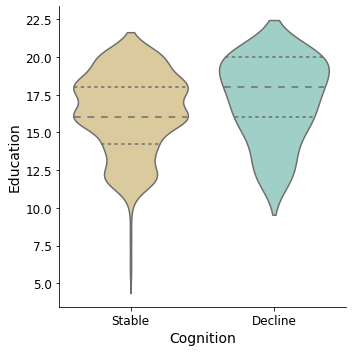

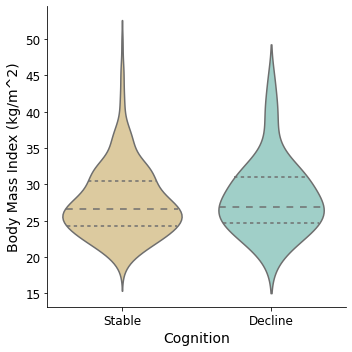

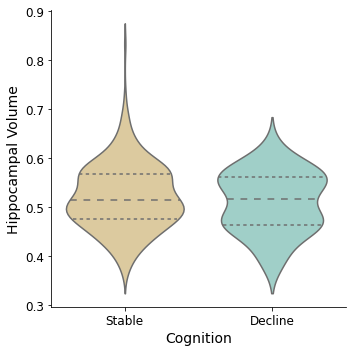

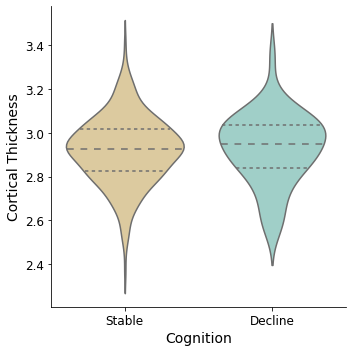

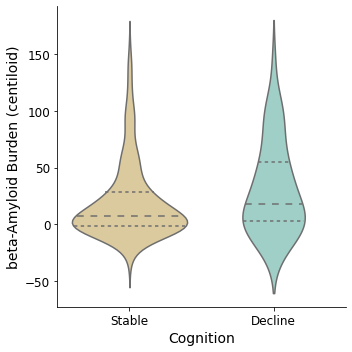

Accuracy on training set: 1.000
Accuracy on test set: 0.750
Accuracy on training set: 0.889
Accuracy on test set: 0.826
Accuracy on training set: 1.000
Accuracy on test set: 0.837
Accuracy on training set: 0.981
Accuracy on test set: 0.815
Accuracy on training set: 0.875
Accuracy on test set: 0.837
Accuracy on training set: 0.875
Accuracy on test set: 0.848


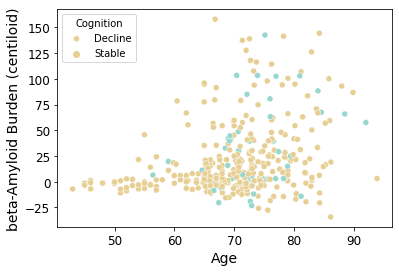

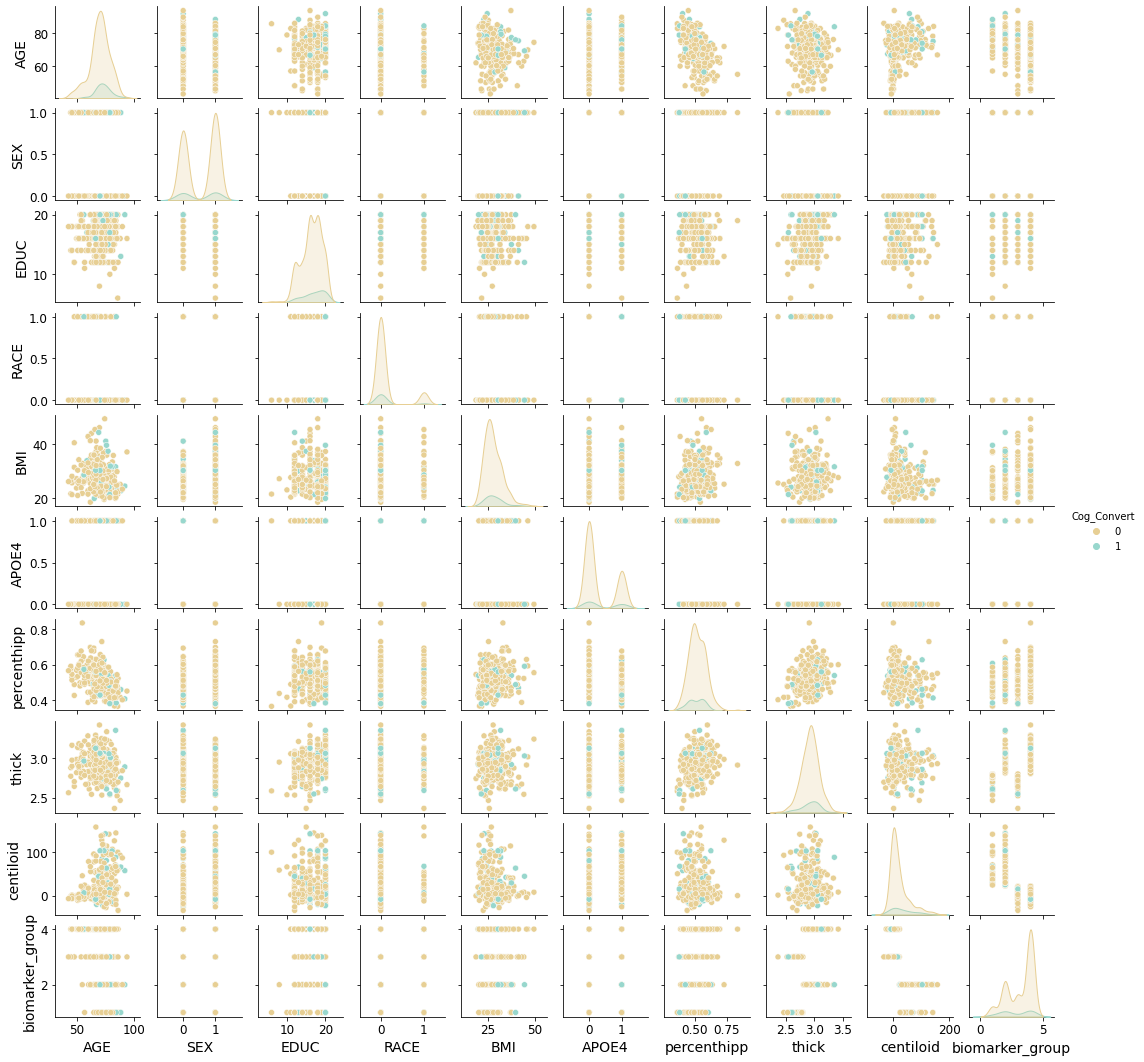

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Graph within notebook
%matplotlib inline 

# Set up matplotlib
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Set a random seed
np.random.seed(42)

# Load the data
df = pd.read_csv(r'./Data/data_for_python.csv')

# What are the column headings 
print("df.keys():\n", df.keys())
df.head()

df.tail()

# Check missing data and data types
df.info()

# Drop irrelevant columns: ID and followup time
df=df.drop("ID", axis=1)
df=df.drop("followuptime", axis=1)

# How are sex and race coded in the data? 
print(f'Sex is coded as: \n{df["SEX"].value_counts()} \n')
print(f'Race is coded as: \n{df["RACE"].value_counts()} \n')

# Recode sex and race as numberical
df["SEX"]=df["SEX"].replace(("Male","Female"),(0,1)) # Males: 0, Females: 1
df["RACE"]=df["RACE"].replace(("White","non-White"),(0,1)) # White: 0, non-White: 1
df.head()

# Set incomplete rows as a variable to visualize
missingdata = df[df.isnull().any(axis=1)].head()
missingdata

# Input median for missing BMI data
medianBMI=df["BMI"].median()
df["BMI"].fillna(medianBMI, inplace=True)
df

df.describe()

# Histogram 
df.hist(bins=50, figsize=(20,15));

# Split the training and test set such that both contain the same percentages 
from sklearn.model_selection import StratifiedShuffleSplit

shuffle_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in shuffle_split.split(df, df["biomarker_group"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

strat_train_set.head()

# Display the percentages for biomarker groups 
print('Percentages for income categories')
print('Stratified')
display(strat_test_set["biomarker_group"].value_counts() / len(strat_test_set))

# Check above against the original data
print('Original')
display(df["biomarker_group"].value_counts() / len(df))

train_copy=strat_train_set.copy()

# Counts for cognitive converters vs non-converters 
fig1=sns.catplot(x="Cog_Convert", kind="count", palette="BrBG",data=train_copy)
fig1.set(xlabel="Cognition")
fig1.set_xticklabels(["Stable", "Decline"])
plt.show()

# Converters vs Sex
fig2=sns.catplot(x="Cog_Convert", hue="SEX", legend=False, palette="BrBG", kind="count", data=train_copy);
fig2.set(xlabel="Cognition")
fig2.set_xticklabels(["Stable", "Decline"])
plt.legend(title='Sex', loc='upper right', labels=['Male', 'Female'], frameon=False)
plt.show()

# Converters vs Race
fig3=sns.catplot(x="Cog_Convert", hue="RACE", legend=False, palette="BrBG", kind="count", data=train_copy);
fig3.set(xlabel="Cognition")
fig3.set_xticklabels(["Stable", "Decline"])
plt.legend(title='Race', loc='upper right', labels=['White', 'nonWhite'], frameon=False)
plt.show()

# Converters vs APOE e4 carriers 
fig4=sns.catplot(x="Cog_Convert", hue="APOE4", legend=False, palette="BrBG", kind="count", data=train_copy);
fig4.set(xlabel="Cognition")
fig4.set_xticklabels(["Stable", "Decline"])
plt.legend(title='APOE e4', loc='upper right', labels=['nonCarrier', 'Carrier'], frameon=False)
plt.show()

# Converters vs biomarker group 
fig5=sns.catplot(x="Cog_Convert", hue="biomarker_group", legend=False, palette="BrBG", kind="count", data=train_copy);
fig5.set(xlabel="Cognition")
fig5.set_xticklabels(["Stable", "Decline"])
plt.legend(title='Biomarker Group', loc='upper right', labels=['A+N+', 'A+N-','A-N+', 'A-N-'], frameon=False)
plt.show()

# Converters and Age
fig6=sns.catplot(x="Cog_Convert", y="AGE", legend=False, palette="BrBG", kind="violin", inner="quartile",data=train_copy);
fig6.set(xlabel="Cognition", ylabel="Age")
fig6.set_xticklabels(["Stable", "Decline"])
plt.show()

# Converters and Education 
fig7=sns.catplot(x="Cog_Convert", y="EDUC", legend=False, palette="BrBG", kind="violin", inner="quartile",data=train_copy);
fig7.set(xlabel="Cognition", ylabel="Education")
fig7.set_xticklabels(["Stable", "Decline"])
plt.show()

# Converters and BMI 
fig8=sns.catplot(x="Cog_Convert", y="BMI", legend=False, palette="BrBG", kind="violin", inner="quartile",data=train_copy);
fig8.set(xlabel="Cognition", ylabel="Body Mass Index (kg/m^2)")
fig8.set_xticklabels(["Stable", "Decline"])
plt.show()

# Converters and Hippocampal Volume  
fig9=sns.catplot(x="Cog_Convert", y="percenthipp", legend=False, palette="BrBG", kind="violin", inner="quartile",data=train_copy);
fig9.set(xlabel="Cognition", ylabel="Hippocampal Volume")
fig9.set_xticklabels(["Stable", "Decline"])
plt.show()

# Converters and Cortical thickness 
fig10=sns.catplot(x="Cog_Convert", y="thick", legend=False, palette="BrBG", kind="violin", inner="quartile",data=train_copy);
fig10.set(xlabel="Cognition", ylabel="Cortical Thickness")
fig10.set_xticklabels(["Stable", "Decline"])
plt.show()

# Converters and Centiloid
fig10=sns.catplot(x="Cog_Convert", y="centiloid", legend=False, palette="BrBG", kind="violin", inner="quartile",data=train_copy);
fig10.set(xlabel="Cognition", ylabel="beta-Amyloid Burden (centiloid)")
fig10.set_xticklabels(["Stable", "Decline"])
plt.show()

fig11=sns.scatterplot(x="AGE", y="centiloid", hue="Cog_Convert", palette="BrBG", data=train_copy)
fig11.set(xlabel="Age", ylabel="beta-Amyloid Burden (centiloid)")
fig11.legend(title="Cognition", labels=["Decline", "Stable"]);

sns.pairplot(train_copy, hue="Cog_Convert", palette="BrBG", height=1.5);

# correlation matrix 
corr_matrix=train_copy.corr()
corr_matrix["Cog_Convert"].sort_values(ascending=False)

# Age and others 
train_copy["age_percenthipp"]=train_copy["percenthipp"]/train_copy["AGE"]
train_copy["age_thick"]=train_copy["thick"]/train_copy["AGE"]
train_copy["age_centiloid"]=train_copy["centiloid"]/train_copy["AGE"]

# Imaging measures
train_copy["hipp_thick"]=train_copy["percenthipp"]/train_copy["thick"]
train_copy["hipp_centiloid"]=train_copy["percenthipp"]/train_copy["centiloid"]

# BMI
train_copy["BMI_centiloid"]=train_copy["BMI"]/train_copy["centiloid"]

# correlation matrix on new added variables
corr_matrix=train_copy.corr()
corr_matrix["Cog_Convert"].sort_values(ascending=False)

train = strat_train_set.drop("Cog_Convert", axis=1) # drop labels for training set
train_labels = strat_train_set["Cog_Convert"].copy() # which is our target 

train.head()

train_labels

#set up entire workflow as a pipeline  
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features=train.drop(["SEX","RACE","APOE4","biomarker_group"], axis=1)
categorical_features=train.drop(["AGE","EDUC","BMI","percenthipp","thick","centiloid"], axis=1)
numeric_features=list(numeric_features)
categorical_features=list(categorical_features)


numeric_transformer=Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),  # centers and scales the data
])


preprocessor=ColumnTransformer([
        ("num", numeric_transformer, numeric_features),
        ("cat", OneHotEncoder(), categorical_features),
    ])


train_prepared = preprocessor.fit_transform(train)

train_prepared

# Separate predictors and target
test = strat_test_set.drop("Cog_Convert", axis=1) # drop labels for test set
test_labels = strat_test_set["Cog_Convert"].copy() # which is our target 

test.head()
test_labels

numeric_features=test.drop(["SEX","RACE","APOE4","biomarker_group"], axis=1)
categorical_features=test.drop(["AGE","EDUC","BMI","percenthipp","thick","centiloid"], axis=1)
numeric_features=list(numeric_features)
categorical_features=list(categorical_features)


numeric_transformer=Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),  # centers and scales the data
])


preprocessor=ColumnTransformer([
        ("num", numeric_transformer, numeric_features),
        ("cat", OneHotEncoder(), categorical_features),
    ])


test_prepared = preprocessor.fit_transform(test)

import sys
!{sys.executable} -m pip install mglearn 
import mglearn

X_train=train_prepared
X_test=test_prepared
y_train=train_labels
y_test=test_labels

# decision tree, no pruning
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set using the Decision Tree Classifier: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set using the Decision Tree Classifier: {:.3f}".format(tree.score(X_test, y_test)))

# decision tree, prune at depth of 3
tree = DecisionTreeClassifier(max_depth=3, random_state=0) 
tree.fit(X_train, y_train)
print("Accuracy on training set using the Decision Tree Classifier after setting the max depth to 3: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set using the Decision Tree Classifier after setting the max depth to 3: {:.3f}".format(tree.score(X_test, y_test)))

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_features=10, n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set using the Random Forest Classifier: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set using the Random Forest Classifier: {:.3f}".format(forest.score(X_test, y_test)))

from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set using the Gradient Boosting Classifier: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set using the Gradient Boosting Classifier: {:.3f}".format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01) # change learning rate
gbrt.fit(X_train, y_train)
print("Accuracy on training set using the Gradient Boosting Classifier and setting the learning rate to 0.01: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set using the Gradient Boosting Classifier and setting the learning rate to 0.01: {:.3f}".format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set using the Gradient Boosting Classifier and setting the max depth to 1: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set using the Gradient Boosting Classifier and setting the max depth to 1: {:.3f}".format(gbrt.score(X_test, y_test)))